In [1]:
import pandas as pd
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


train = pd.read_table('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt',index_col=0)
test = pd.read_table('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt',index_col=0)

In [2]:
# # request를 통하여 데이터 가져오는 방법
# urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
# urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")
# train_data = pd.read_table('ratings_train.txt')
# test_data = pd.read_table('ratings_test.txt')

In [3]:
train.loc[train.document.isna()]

,document,label
id,,
2172111,NaN,1
6369843,NaN,1
1034280,NaN,0
5942978,NaN,0
1034283,NaN,0


In [4]:
train_1 = train.dropna()

In [5]:
test.loc[test.document.isna()]

,document,label
id,,
402110,NaN,1
5026896,NaN,0
511097,NaN,1


In [6]:
test_1 = test.dropna()

In [7]:
train_1.head()

,document,label
id,,
9976970,아 더빙.. 진짜 짜증나네요 목소리,0
3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
10265843,너무재밓었다그래서보는것을추천한다,0
9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [8]:
import re


train_1['document'] = train_1['document'].str.replace('[^A-Za-z0-9가-힣]', ' ')

C:\Users\msi\AppData\Local\Temp\ipykernel_57956\3460000989.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  train_1['document'] = train_1['document'].str.replace('[^A-Za-z0-9가-힣]', ' ')
C:\Users\msi\AppData\Local\Temp\ipykernel_57956\3460000989.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_1['document'] = train_1['document'].str.replace('[^A-Za-z0-9가-힣]', ' ')


In [9]:
train_1

,document,label
id,,
9976970,아 더빙 진짜 짜증나네요 목소리,0
3819312,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나,1
10265843,너무재밓었다그래서보는것을추천한다,0
9045019,교도소 이야기구먼 솔직히 재미는 없다 평점 조정,0
6483659,사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...
6222902,인간이 문제지 소는 뭔죄인가,0
8549745,평점이 너무 낮아서,1
9311800,이게 뭐요 한국인은 거들먹거리고 필리핀 혼혈은 착하다,0


In [10]:
test_1['document'] = test_1['document'].str.replace('[^A-Za-z0-9가-힣]', ' ')

C:\Users\msi\AppData\Local\Temp\ipykernel_57956\2600540520.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  test_1['document'] = test_1['document'].str.replace('[^A-Za-z0-9가-힣]', ' ')
C:\Users\msi\AppData\Local\Temp\ipykernel_57956\2600540520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_1['document'] = test_1['document'].str.replace('[^A-Za-z0-9가-힣]', ' ')


In [11]:
test_1

,document,label
id,,
6270596,굳,1
9274899,GDNTOPCLASSINTHECLUB,0
8544678,뭐야 이 평점들은 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
6723715,3D만 아니었어도 별 다섯 개 줬을텐데 왜 3D로 나와서 제 심기를 불편하게 하죠,0
...,...,...
4608761,오랜만에 평점 로긴했네 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
9072549,그림도 좋고 완성도도 높았지만 보는 내내 불안하게 만든다,0


In [12]:
test

,document,label
id,,
6270596,굳 ㅋ,1
9274899,GDNTOPCLASSINTHECLUB,0
8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...
4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0


In [13]:
print('훈련용 리뷰 개수 :',len(train_1)) # 훈련용 리뷰 개수 출력
print('테스트용 리뷰 개수 :',len(test_1)) # 테스트용 리뷰 개수 출력

훈련용 리뷰 개수 : 149995
테스트용 리뷰 개수 : 49997


In [14]:
# document 열과 label 열의 중복을 제외한 값의 개수
train_1['document'].nunique(), train_1['label'].nunique()

(145500, 2)

In [15]:
# document 열의 중복 제거
train_1.drop_duplicates(subset=['document'], inplace=True)
print('총 샘플의 수 :',len(train_1))

총 샘플의 수 : 145500


C:\Users\msi\AppData\Local\Temp\ipykernel_57956\3275519478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_1.drop_duplicates(subset=['document'], inplace=True)


<AxesSubplot:>

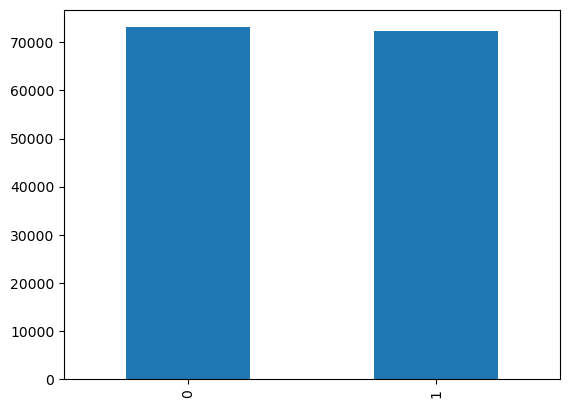

In [16]:
train_1['label'].value_counts().plot(kind = 'bar')

In [17]:
## 특수문자 를 제거한후 공백으로만 존재하는 컬럼 결측치 처리
train_1['document'] = train_1['document'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
train_1['document'].replace('', np.nan, inplace=True)
print(train_1.isnull().sum())

C:\Users\msi\AppData\Local\Temp\ipykernel_57956\1666298936.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_1['document'] = train_1['document'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
C:\Users\msi\AppData\Local\Temp\ipykernel_57956\1666298936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_1['document'] = train_1['document'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
C:\Users\msi\AppData\Local\Temp\ipykernel_57956\1666298936.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

document    37
label        0
dtype: int64


In [18]:
## 결측치인행 확인
train_1.loc[train_1.document.isnull()][:5]

,document,label
id,,
7425748,NaN,0
7095375,NaN,1
7957379,NaN,1
7872211,NaN,1
7487264,NaN,0


In [19]:
# Null 샘플들은 레이블이 긍정일 수도 있고, 부정일 수도 있습니다. 아무런 의미도 없는 데이터므로 제거해줍니다.

train_1 = train_1.dropna(how = 'any')
print(len(train_1))

145463


In [20]:
### 테스트 데이터 위와 같은 처리

test_1.drop_duplicates(subset = ['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
test_1['document'] = test_1['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_1['document'] = test_1['document'].str.replace('^ +', "") # 공백은 empty 값으로 변경
test_1['document'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경

C:\Users\msi\AppData\Local\Temp\ipykernel_57956\1081645463.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_1.drop_duplicates(subset = ['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
C:\Users\msi\AppData\Local\Temp\ipykernel_57956\1081645463.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  test_1['document'] = test_1['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
C:\Users\msi\AppData\Local\Temp\ipykernel_57956\1081645463.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_1['d

In [21]:
test_1 = test_1.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_1))

전처리 후 테스트용 샘플의 개수 : 48688


Okt는 위와 같이 KoNLPy에서 제공하는 형태소 분석기입니다. 한국어을 토큰화할 때는 영어처럼 띄어쓰기 기준으로 토큰화를 하는 것이 아니라, 주로 형태소 분석기를 사용한다고 언급한 바 있습니다. stem = True를 사용하면 일정 수준의 정규화를 수행해주는데,

In [22]:
# train 데이터
X_train = []
okt = Okt()
for sentence in tqdm(train_1['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_train.append(stopwords_removed_sentence)

JVMNotSupportedException: JVM mismatch, python is 64 bit and JVM is 32 bit.

In [107]:
# 테스트 데이터
X_test = []
okt = Okt()
for sentence in tqdm(test_1['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_test.append(stopwords_removed_sentence)

JVMNotFoundException: No JVM shared library file (jvm.dll) found. Try setting up the JAVA_HOME environment variable properly.

In [ ]:
## 정수 인코딩
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
print(tokenizer.word_index)

In [ ]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

In [ ]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

In [ ]:
## 텍스트 시퀀스를 정수 시퀀스로 변환
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

print(X_train[:3])# 확인

In [ ]:
y_train = np.array(train_1['label'])
y_test = np.array(test_1['label'])

전체 데이터에서 빈도수가 낮은 단어가 삭제되었다는 것은 빈도수가 낮은 단어만으로 구성되었던 샘플들은 빈(empty) 샘플이 되었다는 것을 의미합니다. 빈 샘플들은 어떤 레이블이 붙어있던 의미가 없으므로 빈 샘플들을 제거해주는 작업을 하겠습니다.

In [ ]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [ ]:
# 빈 샘플들을 제거
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

# 패딩

In [ ]:
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

# 가장 긴 리뷰의 길이는 69이며, 그래프를 봤을 때 전체 데이터의 길이 분포는 대체적으로 약 11내외의 길이를 가지는 것을 볼 수 있습니다

In [ ]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

# 위의 분포 그래프를 봤을 때, max_len = 30이 적당할 것 같습니다

In [ ]:
max_len = 30
below_threshold_len(max_len, X_train)

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

### LSTM 영화 리뷰 감성분류

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

### 모델을 통하여 리뷰 예측해보기

In [ ]:
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))

In [ ]:
sentiment_predict('이 영화 개꿀잼 ㅋㅋㅋ')

In [ ]:
sentiment_predict('이 영화 핵노잼 ㅠㅠ')